In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from statsmodels.stats import diagnostic as diag
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import levene
from scipy.stats import ranksums

C:\Users\scsuser\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [38]:
df = pd.read_csv('Revenue History.csv', index_col=0)
df.columns = ['BPEELPParttime', 'Business', 'CreativeWriting', 'Engineering', 
              'LangForeign', 'LangFrench', 'LectureSeries', 'LiberalStudies', 'GrandTotal']
df_lecture = (df.LectureSeries).dropna(axis=0, how='any')
df_lecture = df_lecture.append((df.GrandTotal).iloc[-2:,])

In [3]:
mod_grandtotal = sm.tsa.statespace.SARIMAX(df.GrandTotal, trend='n', order=(0,1,2), 
                                 seasonal_order=(0,1,0,3))
results_grandtotal = mod_grandtotal.fit()
print(results_grandtotal.summary())

                                 Statespace Model Results                                
Dep. Variable:                        GrandTotal   No. Observations:                   39
Model:             SARIMAX(0, 1, 2)x(0, 1, 0, 3)   Log Likelihood                -451.602
Date:                           Thu, 22 Feb 2018   AIC                            909.205
Time:                                   11:19:03   BIC                            914.195
Sample:                               05-01-2006   HQIC                           910.995
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3944      0.158     -2.489      0.013      -0.705      -0.084
ma.L2         -0.3303      0.139     -2.371

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [4]:
mod_liberal = sm.tsa.statespace.SARIMAX(df.LiberalStudies, trend='n', order=(3,1,0), 
                                 seasonal_order=(0,1,0,3))
results_liberal = mod_liberal.fit()
print(results_liberal.summary())

                                 Statespace Model Results                                
Dep. Variable:                    LiberalStudies   No. Observations:                   39
Model:             SARIMAX(3, 1, 0)x(0, 1, 0, 3)   Log Likelihood                -362.261
Date:                           Thu, 22 Feb 2018   AIC                            732.522
Time:                                   11:19:03   BIC                            739.176
Sample:                               05-01-2006   HQIC                           734.910
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3739      0.135     -2.763      0.006      -0.639      -0.109
ar.L2         -0.3228      0.106     -3.044

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [5]:
mod_lecture = sm.tsa.statespace.SARIMAX(df_lecture, trend='n', order=(1,1,0), 
                                 seasonal_order=(0,0,0,2))
results_lecture = mod_lecture.fit()
print(results_lecture.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -251.572
Date:                Thu, 22 Feb 2018   AIC                            507.145
Time:                        11:19:03   BIC                            509.661
Sample:                    09-01-2006   HQIC                           507.869
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6522      0.049    -13.258      0.000      -0.749      -0.556
sigma2      1.431e+08   8.84e-12   1.62e+19      0.000    1.43e+08    1.43e+08
Ljung-Box (Q):                         nan   Jarque-

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\scsuser\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1487: RuntimeWarning: divide by zero encountered in true_divide
  return s[..., 0]/s[..., -1]


In [6]:
mod_langfrench = sm.tsa.statespace.SARIMAX((df.LangFrench).iloc[9:,], trend='n', order=(0,0,1), 
                                 seasonal_order=(0,1,0,3))
results_langfrench = mod_langfrench.fit()
print(results_langfrench.summary())

                                 Statespace Model Results                                
Dep. Variable:                        LangFrench   No. Observations:                   30
Model:             SARIMAX(0, 0, 1)x(0, 1, 0, 3)   Log Likelihood                -261.083
Date:                           Thu, 22 Feb 2018   AIC                            526.166
Time:                                   11:19:05   BIC                            528.968
Sample:                               05-01-2009   HQIC                           527.062
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5037      0.142      3.557      0.000       0.226       0.781
sigma2      1.684e+08   1.36e-10   1.24e+18

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [7]:
mod_engineer = sm.tsa.statespace.SARIMAX(df.Engineering, trend='n', order=(1,0,0), 
                                 seasonal_order=(0,1,0,3))
results_engineer = mod_engineer.fit()
print(results_engineer.summary())

                                 Statespace Model Results                                
Dep. Variable:                       Engineering   No. Observations:                   39
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 3)   Log Likelihood                -348.529
Date:                           Thu, 22 Feb 2018   AIC                            701.058
Time:                                   11:19:05   BIC                            704.385
Sample:                               05-01-2006   HQIC                           702.251
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5298      0.178      2.976      0.003       0.181       0.879
sigma2       8.65e+09   3.07e-12   2.82e+21

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\scsuser\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1487: RuntimeWarning: divide by zero encountered in true_divide
  return s[..., 0]/s[..., -1]


In [8]:
mod_creative = sm.tsa.statespace.SARIMAX(df.CreativeWriting, trend='n', order=(1,1,0), 
                                 seasonal_order=(0,1,0,3))
results_creative = mod_creative.fit()
print(results_creative.summary())

                                 Statespace Model Results                                
Dep. Variable:                   CreativeWriting   No. Observations:                   39
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 3)   Log Likelihood                -392.569
Date:                           Thu, 22 Feb 2018   AIC                            789.138
Time:                                   11:19:06   BIC                            792.465
Sample:                               05-01-2006   HQIC                           790.332
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5581      0.140     -3.995      0.000      -0.832      -0.284
sigma2      2.483e+09   1.34e-11   1.85e+20

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\scsuser\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1487: RuntimeWarning: divide by zero encountered in true_divide
  return s[..., 0]/s[..., -1]


In [9]:
mod_bpeelppart = sm.tsa.statespace.SARIMAX(df.BPEELPParttime, trend='n', order=(1,1,0), 
                                 seasonal_order=(0,1,0,3))
results_bpeelppart = mod_bpeelppart.fit()
print(results_bpeelppart.summary())

                                 Statespace Model Results                                
Dep. Variable:                    BPEELPParttime   No. Observations:                   39
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 3)   Log Likelihood                -370.523
Date:                           Thu, 22 Feb 2018   AIC                            745.046
Time:                                   11:19:06   BIC                            748.373
Sample:                               05-01-2006   HQIC                           746.239
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3402      0.184     -1.846      0.065      -0.701       0.021
sigma2      6.654e+08   5.03e-11   1.32e+19

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\scsuser\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1487: RuntimeWarning: divide by zero encountered in true_divide
  return s[..., 0]/s[..., -1]


In [10]:
mod_langforeign = sm.tsa.statespace.SARIMAX(df.LangForeign, trend='n', order=(0,1,1), 
                                 seasonal_order=(0,1,1,3))
results_langforeign = mod_langforeign.fit()
print(results_langforeign.summary())

                                 Statespace Model Results                                
Dep. Variable:                       LangForeign   No. Observations:                   39
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 3)   Log Likelihood                -367.994
Date:                           Thu, 22 Feb 2018   AIC                            741.988
Time:                                   11:19:06   BIC                            746.978
Sample:                               05-01-2006   HQIC                           743.778
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3494      0.146     -2.388      0.017      -0.636      -0.063
ma.S.L3       -0.3476      0.155     -2.240

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\scsuser\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1487: RuntimeWarning: divide by zero encountered in true_divide
  return s[..., 0]/s[..., -1]


In [11]:
mod_business = sm.tsa.statespace.SARIMAX(df.Business, trend='n', order=(0,1,2), 
                                 seasonal_order=(0,1,0,3))
results_business = mod_business.fit()
print(results_business.summary())

                                 Statespace Model Results                                
Dep. Variable:                          Business   No. Observations:                   39
Model:             SARIMAX(0, 1, 2)x(0, 1, 0, 3)   Log Likelihood                -442.619
Date:                           Thu, 22 Feb 2018   AIC                            891.238
Time:                                   11:19:06   BIC                            896.229
Sample:                               05-01-2006   HQIC                           893.029
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3721      0.173     -2.150      0.032      -0.711      -0.033
ma.L2         -0.3220      0.152     -2.122

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [12]:
def predict_todf(column, results, n, text, num):
    predict = results.get_prediction(full_results=True,alpha=0.05)
    predi_mean = predict.predicted_mean
    predi_mea = predi_mean.iloc[n:]

    predi_conf = predict.conf_int(alpha=0.05)
    predi_conf.columns = ['lower', 'upper']
    predi_con = predi_conf.iloc[n:]
    df_b = pd.DataFrame(predi_con, columns=['lower', 'upper'])
    df_b['mean'] = predi_mea
    df_b = df_b[['mean', 'lower', 'upper']]
    
    y_forecasted = predi_mean.iloc[n:num]
    y_truth = column.iloc[n:num]
    rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
    mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth))
    mpe = (np.sum((y_truth - y_forecasted) / y_truth))/33
    me = (np.sum(y_truth - y_forecasted))/33

    print(text)
    print('ME: {}'.format(me))
    print('MPE: {}'.format(mpe))
    print('RMSE: {}'.format(rmse))
    print('MAPE: {}'.format(mape))
    print('MAE: {}'.format(mean_absolute_error(y_truth, y_forecasted)))
    print('R**2: {}'.format(r2_score(y_truth, y_forecasted)))
    return df_b

In [13]:
num1 = df.shape[0]-3
num2 = df_lecture.shape[0]-2
num3 = df.shape[0]-12
df_business = predict_todf(df.Business, results_business, 4, 'Business', num1)
df_business.transpose().to_csv('prediction_business.csv')

Business
ME: -68700.70296911249
MPE: -0.02821653861245734
RMSE: 246180.36011678708
MAPE: 0.06795700258610066
MAE: 196298.8798395531
R**2: 0.9636101374766877


In [14]:
df_grandtotal = predict_todf(df.GrandTotal, results_grandtotal, 4, 'Grand Total', num1)
df_grandtotal.transpose().to_csv('prediction_grandtotal.csv')

Grand Total
ME: -88553.71434479272
MPE: -0.027372918484518154
RMSE: 326018.75829708145
MAPE: 0.06166852551804106
MAE: 265757.7125698908
R**2: 0.9668760105865362


In [15]:
df_liberal = predict_todf(df.LiberalStudies, results_liberal, 4, 'Liberal Studies - Core', num1)
df_liberal.transpose().to_csv('prediction_liberal.csv')

Liberal Studies - Core
ME: -2597.2544534076164
MPE: -0.07081810203430994
RMSE: 19936.369338892953
MAPE: 0.2472724720826823
MAE: 16900.786804438318
R**2: 0.8781151733222554


In [16]:
df_lectures = predict_todf(df_lecture, results_lecture, 4, 'Lecture Series', num2)
df_lectures.transpose().to_csv('prediction_lecture.csv')

Lecture Series
ME: 20.769603331400447
MPE: -0.022087687917438814
RMSE: 13092.71299412207
MAPE: 0.16453270535238257
MAE: 10320.893523464041
R**2: 0.07541764393024541


In [17]:
df_langfrench = predict_todf((df.LangFrench).iloc[9:,], results_langfrench, 5, 'Languages - French', num3)
df_langfrench.transpose().to_csv('prediction_langfrench.csv')

Languages - French
ME: 1997.3493255340836
MPE: 0.011259763188235048
RMSE: 12521.403656336197
MAPE: 0.08250353023693618
MAE: 9309.543748237613
R**2: 0.4970530417951935


In [18]:
df_langforeign = predict_todf(df.LangForeign, results_langforeign, 5, 'Languages - Foreign', num1)
df_langforeign.transpose().to_csv('prediction_langforeign.csv')

Languages - Foreign
ME: -1575.156386361512
MPE: -0.02312846502307414
RMSE: 23812.761865805187
MAPE: 0.11499324424094327
MAE: 18953.77670433438
R**2: 0.6199586351354491


In [19]:
df_engineer = predict_todf(df.Engineering, results_engineer, 10, 'Engineering', num1)
df_engineer.transpose().to_csv('prediction_engineer.csv')

Engineering
ME: 33285.506605961724
MPE: 0.08008208528634106
RMSE: 97966.08697908832
MAPE: 0.2307406192487168
MAE: 86827.94738020943
R**2: 0.7302571163779363


In [20]:
df_creative = predict_todf(df.CreativeWriting, results_creative, 2, 'Creative Writing', num1)
df_creative.transpose().to_csv('prediction_creative.csv')

Creative Writing
ME: -4464.056772297131
MPE: -0.0509083297029203
RMSE: 54502.12320665334
MAPE: 0.18390811184926442
MAE: 45958.75764081516
R**2: 0.6498530339239105


In [21]:
df_bpeelppart = predict_todf(df.BPEELPParttime, results_bpeelppart, 0, 'BP & E - ELP Part-time', num1)
df_bpeelppart.transpose().to_csv('prediction_bpeelppart.csv')

BP & E - ELP Part-time
ME: -2107.6545675246243
MPE: -0.009566387633366317
RMSE: 27619.55353719009
MAPE: 0.19234603844464038
MAE: 21599.241105827194
R**2: 0.582399254921492


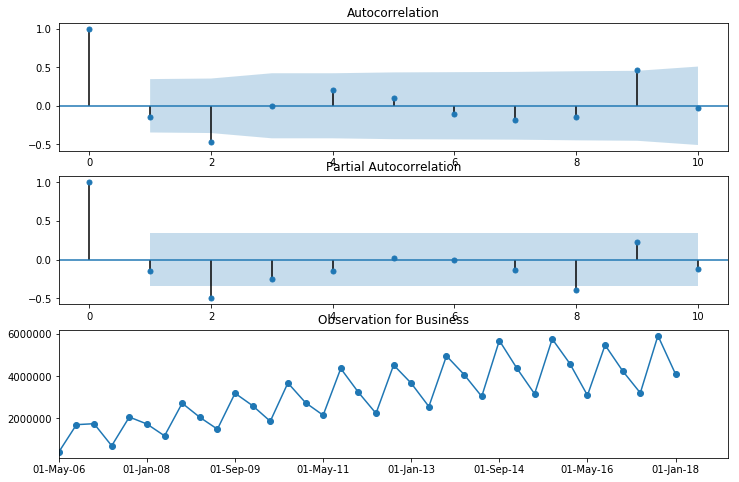

In [22]:
df['first_difference'] = df.Business - df.Business.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.Business.plot(figsize=(12,8), title= 'Observation for Business', marker='o', ax=ax3)
fig

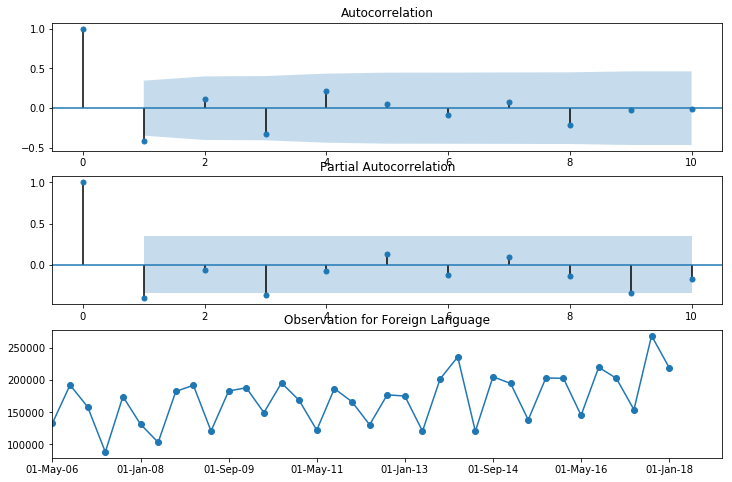

In [23]:
df['first_difference_lf'] = df.LangForeign - df.LangForeign.shift(1)  
df['seasonal_first_difference_langforeign'] = df.first_difference_lf - df.first_difference_lf.shift(3)

fig2 = plt.figure(figsize=(12,8))
ax1 = fig2.add_subplot(311)
fig2 = sm.graphics.tsa.plot_acf(df.seasonal_first_difference_langforeign.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig2.add_subplot(312)
fig2 = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference_langforeign.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig2.add_subplot(313)
df.LangForeign.plot(figsize=(12,8), title= 'Observation for Foreign Language', marker='o', ax=ax3)
fig2

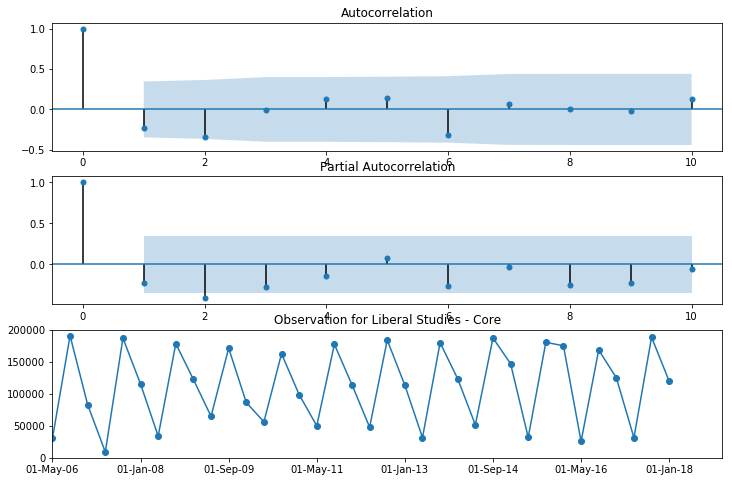

In [24]:
df['first_difference'] = df.LiberalStudies - df.LiberalStudies.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.LiberalStudies.plot(figsize=(12,8), title= 'Observation for Liberal Studies - Core', marker='o', ax=ax3)
fig

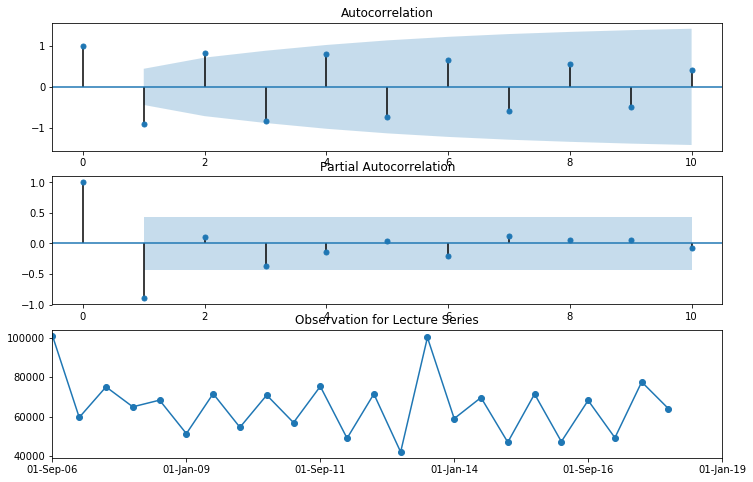

In [39]:
df_lecture = df_lecture.to_frame()
df_lecture['first_difference'] = df_lecture.iloc[:, 0] - df_lecture.iloc[:, 0].shift(1)  
df_lecture['seasonal_first_difference'] = df_lecture.first_difference - df_lecture.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df_lecture.seasonal_first_difference.iloc[4:num2], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df_lecture.seasonal_first_difference.iloc[4:num2], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df_lecture.iloc[:, 0].plot(figsize=(12,8), title= 'Observation for Lecture Series', marker='o', ax=ax3)
fig

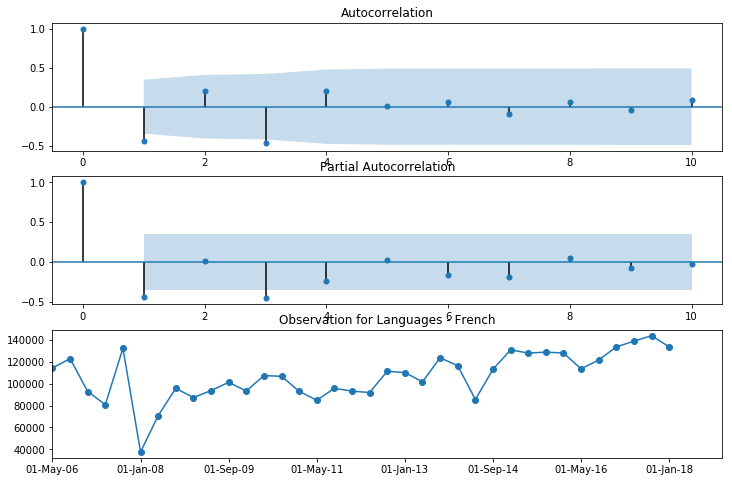

In [40]:
df['first_difference'] = df.LangFrench - df.LangFrench.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.LangFrench.plot(figsize=(12,8), title= 'Observation for Languages - French', marker='o', ax=ax3)
fig

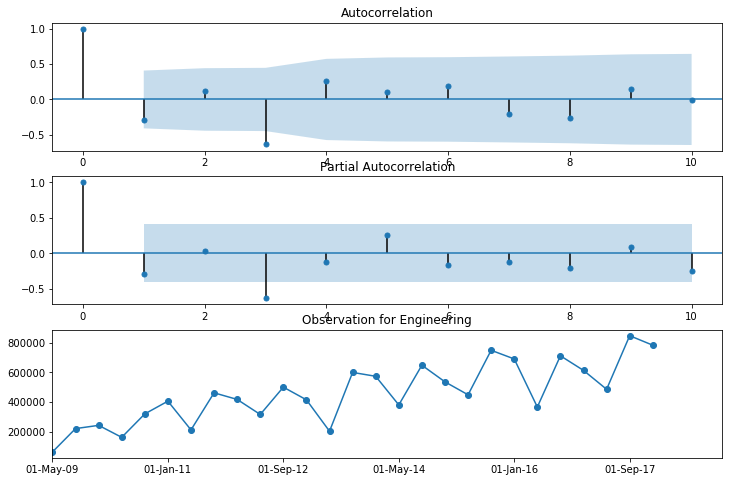

In [41]:
Eng = df.Engineering.iloc[9:]
df['first_difference'] = Eng - Eng.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.Engineering.iloc[9:].plot(figsize=(12,8), title= 'Observation for Engineering', marker='o', ax=ax3)
fig

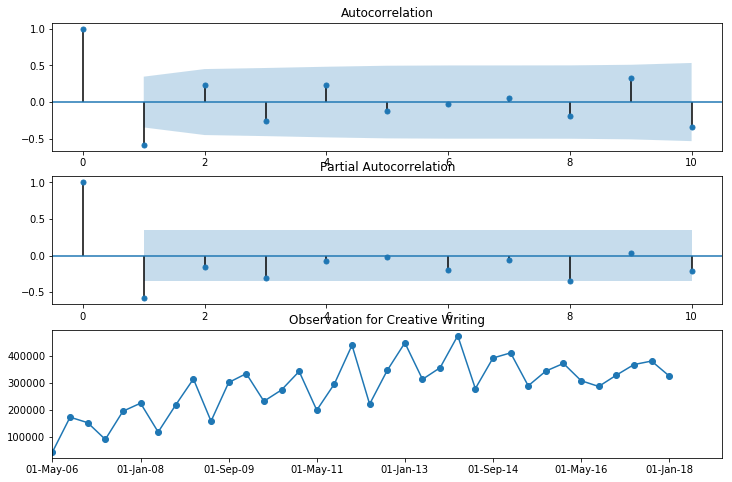

In [42]:
df['first_difference'] = df.CreativeWriting - df.CreativeWriting.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.CreativeWriting.plot(figsize=(12,8), title= 'Observation for Creative Writing', marker='o', ax=ax3)
fig

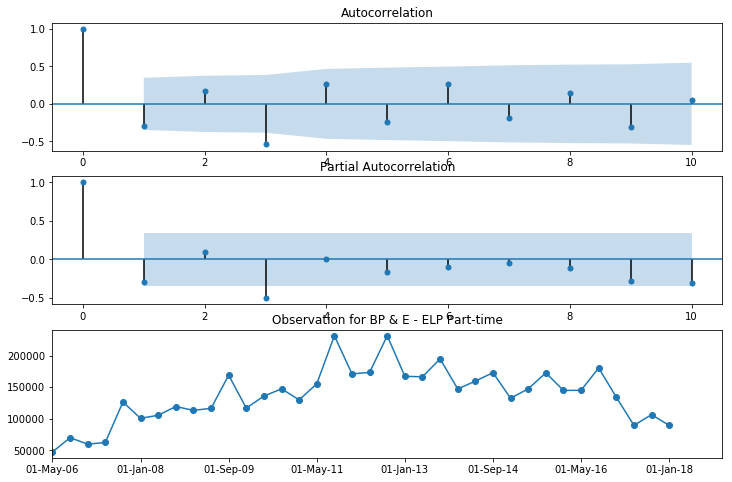

In [43]:
df['first_difference'] = df.BPEELPParttime - df.BPEELPParttime.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.BPEELPParttime.plot(figsize=(12,8), title= 'Observation for BP & E - ELP Part-time', marker='o', ax=ax3)
fig

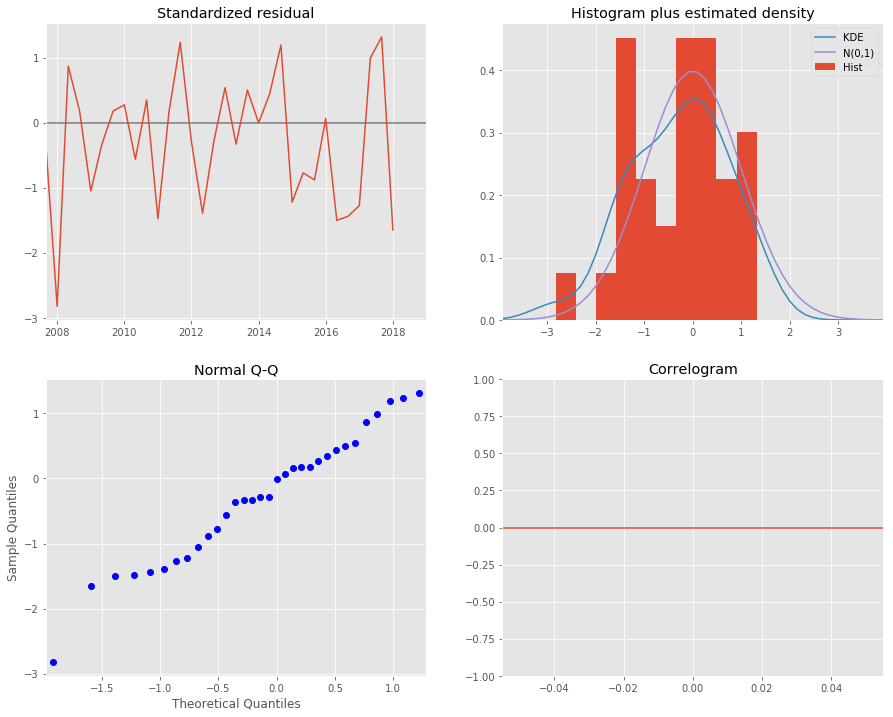

In [44]:
plt.style.use('ggplot')
ax4 = results_business.plot_diagnostics(figsize=(15, 12))
ax4

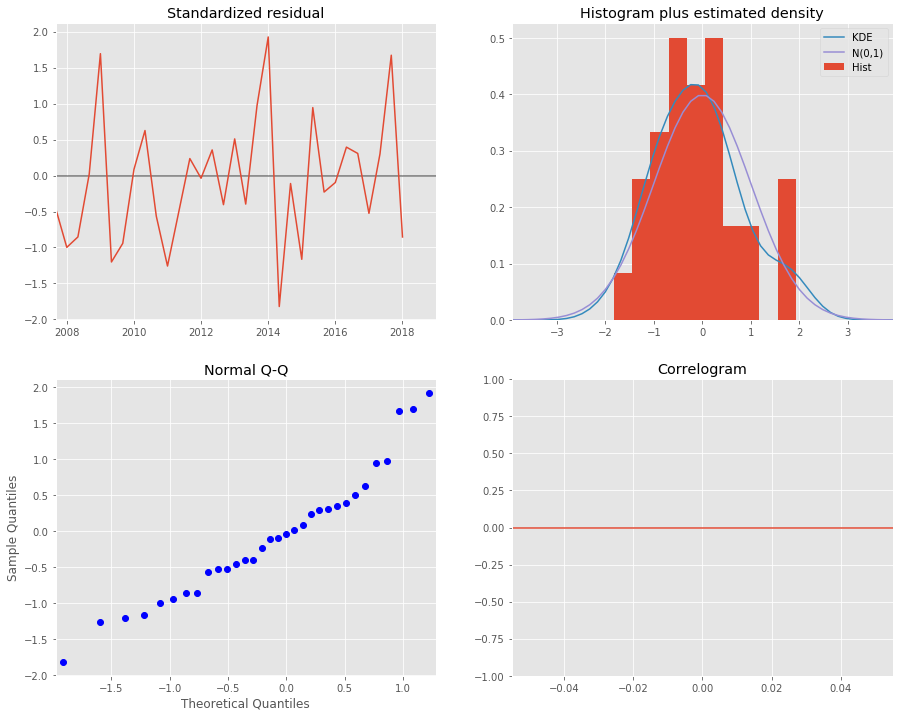

In [45]:
ax5 = results_langforeign.plot_diagnostics(figsize=(15, 12))
ax5

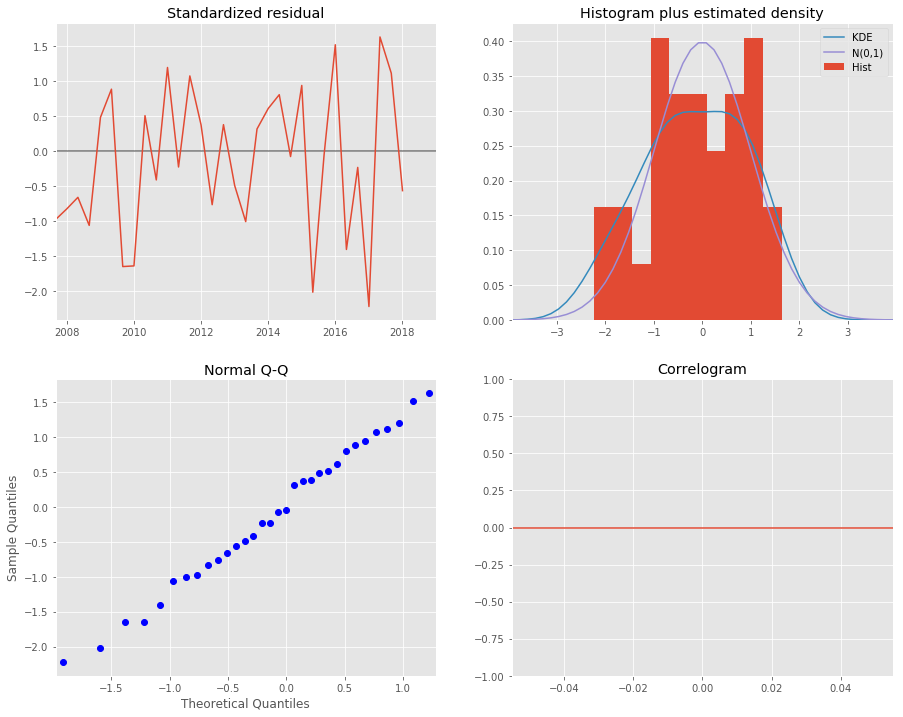

In [46]:
ax6 = results_liberal.plot_diagnostics(figsize=(15, 12))
ax6

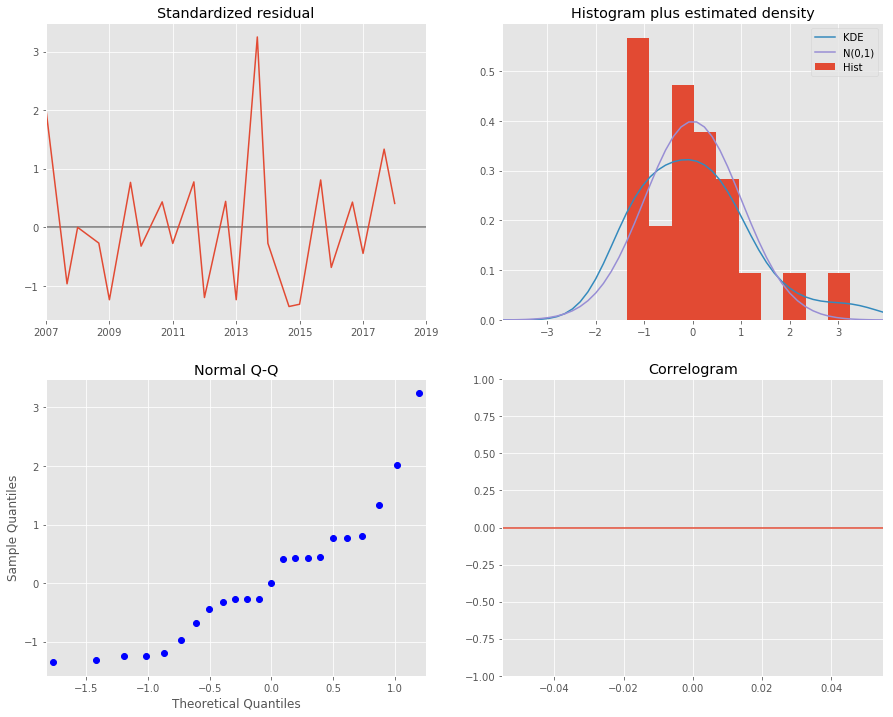

In [47]:
ax7 = results_lecture.plot_diagnostics(figsize=(15, 12))
ax7

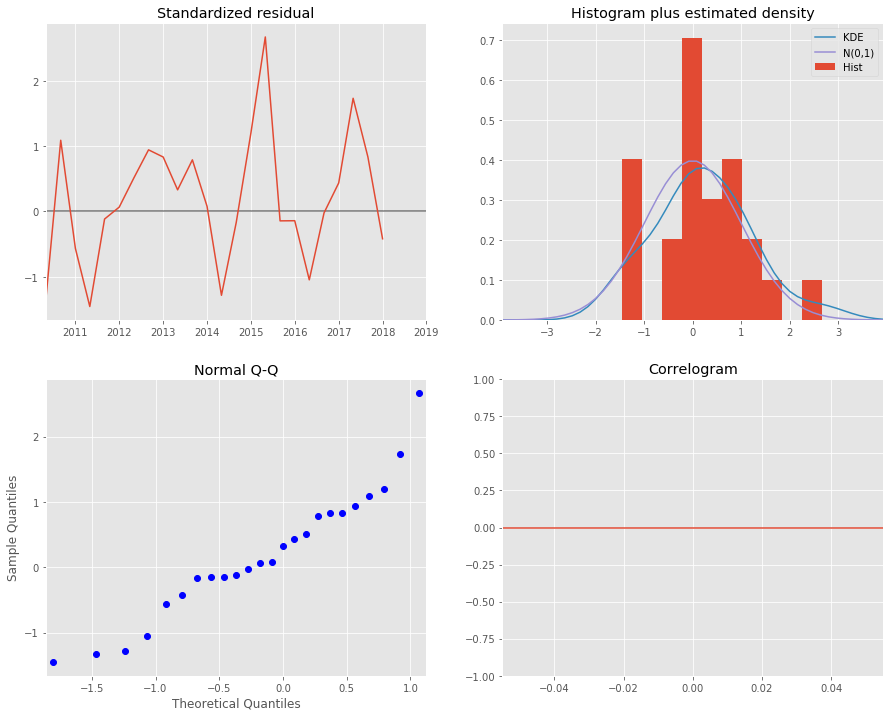

In [48]:
ax8 = results_langfrench.plot_diagnostics(figsize=(15, 12))
ax8

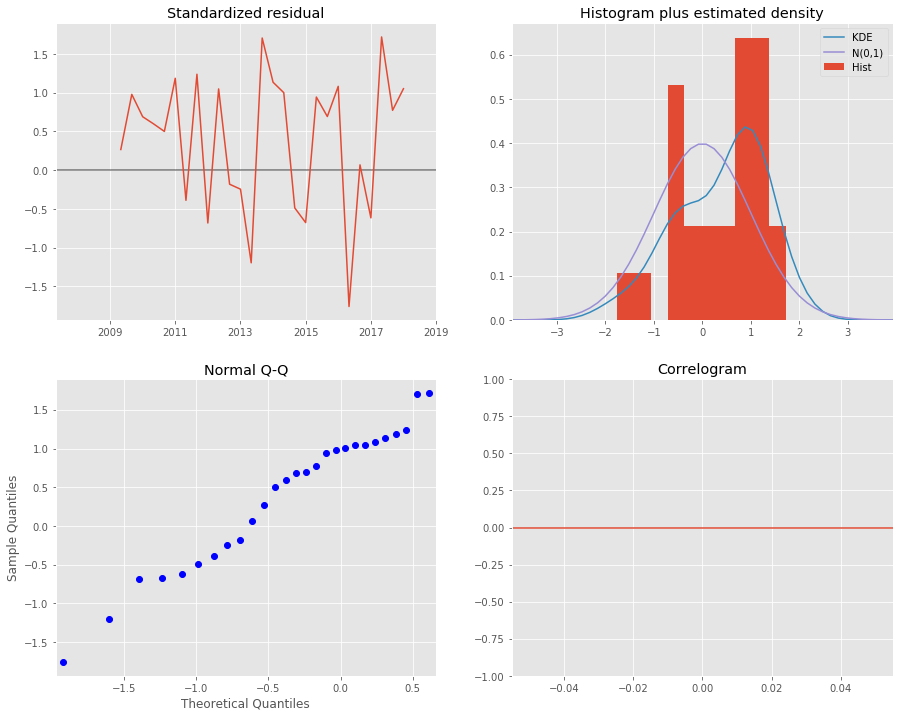

In [49]:
ax9 = results_engineer.plot_diagnostics(figsize=(15, 12))
ax9

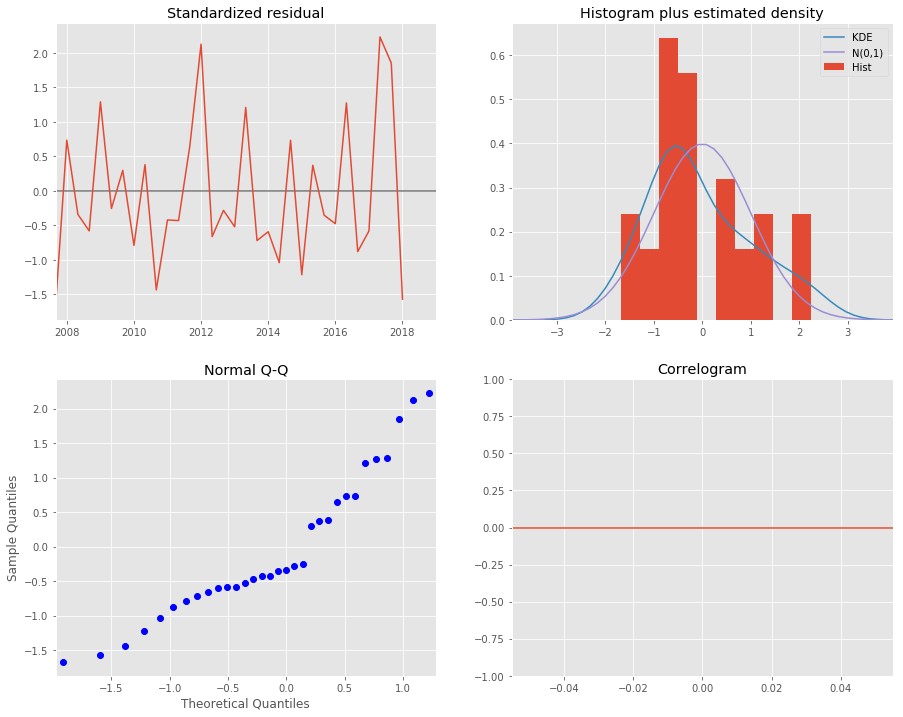

In [50]:
ax10 = results_creative.plot_diagnostics(figsize=(15, 12))
ax10

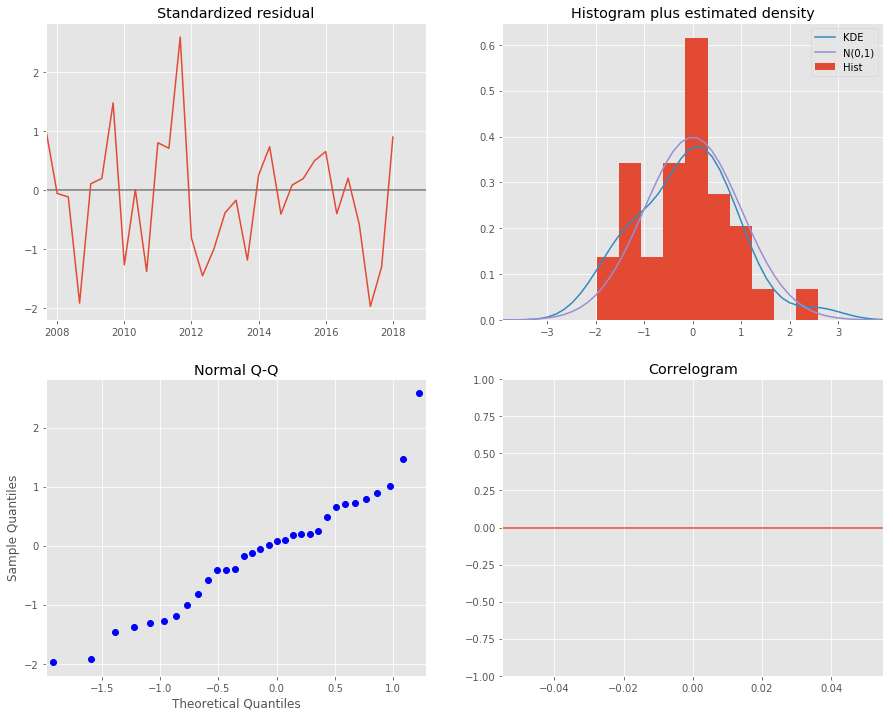

In [51]:
ax11 = results_bpeelppart.plot_diagnostics(figsize=(15, 12))
ax11